** In the following analysis, I aim to gain useful and informative insights into the customer data:**
- **After a thorough data preprocessing and visualization, a metric for forming segmentations and clusters of customers has been evaluated and suggested using a well known machine learning model. Few of the key decisions anlaysed and discussed include determining the number of clusters formed.**
- **An aggregate information grouped by clusters has been provided for better understanding of the characteristics of each cluster of customers. This also helps in identifying the most and least valuable customers.**
- **Determining low and high performing customers can be valuable to reduce the customer churn rate, since specific marketing campaigns can be carried out for the low performing customers.**

In [1]:
### Installing dependencies ###
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA

/Users/sudeepmbp/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
data = pd.read_csv('customer-data.csv', parse_dates= [1, 2]) #### Making sure that the dates columns are properly read

### Exploring the data, preprocessing and performing data validation:

In [3]:
data.head(5)

,customer_id,First Time,Recent Time,# of Orders,# of Orders in last 7 days,# of Orders in last 4 weeks,Amount,Amount in last 7 days,Amount in last 4 weeks,Avg_DistanceFromResturant,Avg_DeliveryTime
0,1269647,2015-06-29 10:57:00,2015-12-10 02:18:00,212,6.0,43.0,138808,4291,26853,1.6,51
1,167631,2015-07-04 15:39:00,2015-12-15 14:42:00,211,8.0,19.0,56404,1925,4177,2.2,42
2,301524,2015-06-26 09:56:00,2015-12-09 20:45:00,189,9.0,33.0,36020,1772,6404,2.5,57
3,1268254,2015-07-01 01:51:00,2015-12-14 01:43:00,184,6.0,37.0,32489,975,7110,3.1,55
4,357161,2015-07-11 18:34:00,2015-12-19 23:26:00,182,4.0,23.0,85150,1738,9958,2.4,36


In [4]:
data.describe()

,customer_id,# of Orders,# of Orders in last 7 days,# of Orders in last 4 weeks,Amount,Amount in last 7 days,Amount in last 4 weeks,Avg_DistanceFromResturant,Avg_DeliveryTime
count,1.000000e+04,10000.000000,1923.000000,4341.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000
mean,6.714023e+05,7.006200,1.734789,3.197650,2253.273600,109.497500,455.491200,2.35620,36.914300
std,3.901880e+05,13.118619,1.369875,3.940818,5136.484499,397.055277,1237.872749,0.97492,13.175413
min,2.800000e+01,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,-0.80000,15.000000
25%,3.365148e+05,1.000000,1.000000,1.000000,279.000000,0.000000,0.000000,1.70000,26.000000
50%,6.683395e+05,2.000000,1.000000,2.000000,688.000000,0.000000,0.000000,2.40000,36.500000
75%,1.005002e+06,7.000000,2.000000,4.000000,2040.000000,0.000000,398.000000,3.02500,47.000000
max,1.355445e+06,212.000000,14.000000,46.000000,138808.000000,10150.000000,26853.000000,5.90000,83.000000


In [4]:
print(data.shape)

(10000, 11)


In [5]:
data.customer_id.unique().shape[0]   ### Reveals that none of the customers is repeated more than once

10000

In [6]:
### Let's also check if the First Time is greater than the Recent Time ###
any(data['First Time'] > data['Recent Time'])

False

In [7]:
data.Avg_DistanceFromResturant.max(), data.Avg_DistanceFromResturant.min()

(5.9, -0.8)

### Removing negative values:

In [8]:
print('# of negatives in Avg Dist: '+ str(len(data.Avg_DistanceFromResturant[data.Avg_DistanceFromResturant < 0])))  
#### Something seems off: How can distance be less than 0?                                                                       

### Checking for negative values in other columns ###
print('# of negatives in Avg Time : '+ str(len(data.Avg_DeliveryTime[data.Avg_DeliveryTime < 0])))
print('# of negatives in Amt in last 4 weeks : '+ str(len(data['Amount in last 4 weeks'][data['Amount in last 4 weeks']< 0])))
print('# of negatives in Amt in last 7 days : '+ str(len(data['Amount in last 7 days'][data['Amount in last 7 days']< 0])))
print('# of negatives in Amount : '+ str(len(data['Amount'][data['Amount']< 0])))
print('# of negatives in  # of Orders in last 4 weeks: '+ str(len(data['# of Orders in last 4 weeks'][data['# of Orders in last 4 weeks']< 0])))
print('# of negatives in  # of Orders in last 7 days: '+ str(len(data['# of Orders in last 7 days'][data['# of Orders in last 7 days']< 0])))
print('# of negatives in  # of Orders: '+ str(len(data['# of Orders'][data['# of Orders']< 0])))
print('# of negatives in  # of Orders in last 4 weeks: '+ str(len(data['# of Orders in last 4 weeks'][data['# of Orders in last 4 weeks']< 0])))

# of negatives in Avg Dist: 44
# of negatives in Avg Time : 0
# of negatives in Amt in last 4 weeks : 0
# of negatives in Amt in last 7 days : 0
# of negatives in Amount : 0
# of negatives in  # of Orders in last 4 weeks: 0
# of negatives in  # of Orders in last 7 days: 0
# of negatives in  # of Orders: 0
# of negatives in  # of Orders in last 4 weeks: 0


**Let's see if there is anything special about the rows of data in which average distance from the restaurant is negative.**

In [9]:
data[data.Avg_DistanceFromResturant < 0]

,customer_id,First Time,Recent Time,# of Orders,# of Orders in last 7 days,# of Orders in last 4 weeks,Amount,Amount in last 7 days,Amount in last 4 weeks,Avg_DistanceFromResturant,Avg_DeliveryTime
1392,359075,2015-08-01 22:40:00,2016-01-06 05:50:00,13,4.0,12.0,1134,345,1050,-0.1,31
2104,1144527,2015-12-10 17:16:00,2015-12-22 16:26:00,9,4.0,9.0,680,295,680,-0.1,48
2378,1108349,2015-10-09 04:39:00,2015-12-26 12:08:00,7,2.0,4.0,2014,706,1242,-0.1,52
3028,1020067,2015-10-30 04:42:00,2015-11-16 10:49:00,5,2.0,5.0,2355,814,2355,-0.2,28
3135,884783,2015-10-25 08:40:00,2015-12-14 06:03:00,5,1.0,2.0,1023,199,321,-0.1,40
4039,413806,2015-07-20 11:39:00,2015-08-31 12:26:00,3,NaN,NaN,373,0,0,-0.1,30
4178,224349,2015-08-06 00:58:00,2015-12-07 14:04:00,3,NaN,NaN,834,0,0,-0.3,23
4549,1258265,2015-06-30 12:57:00,2015-07-30 03:24:00,3,NaN,NaN,397,0,0,-0.1,21
4994,827101,2015-11-07 23:33:00,2015-12-04 07:06:00,2,1.0,1.0,336,192,192,-0.1,46
5333,278579,2015-07-16 01:13:00,2015-08-29 21:45:00,2,NaN,NaN,320,0,0,-0.2,50


**Looks normal : Cannot find any significant evidence as to why those values are negative.**
** Moving on...**

### Handling missing values:

In [10]:
data.isnull().sum(axis = 0)   #### Lots of missing values in # of order in last 7 days and last 4 weeks.

customer_id                       0
First Time                        0
Recent Time                       0
# of Orders                       0
# of Orders in last 7 days     8077
# of Orders in last 4 weeks    5659
Amount                            0
Amount in last 7 days             0
Amount in last 4 weeks            0
Avg_DistanceFromResturant         0
Avg_DeliveryTime                  0
dtype: int64

-  **Upon closer inspection, it can be seen that the 'Nan' values in '# of Orders in last 7 days' and '# of Orders in last 4 weeks' are basically zeroes, since these customers have spent zero in the last 7 days and the last 4 weeks respectively.**
-  **So, as far as preprocessing is concerned, the negative values in 'Avg_DistanceFromResturant' needs to be removed and 0 can be substituted for all the missing values in the number of order in the last 7 days and last 4 weeks.**

In [11]:
### Deleting negative distances observations ###
data.drop(data.index[data.Avg_DistanceFromResturant < 0], inplace= True)

In [12]:
### Replacing 'Nan' values in # of Orders in last 7 days and last 4 weeks with 0 ###
data['# of Orders in last 7 days'][data['# of Orders in last 7 days'].isnull()] = 0
data['# of Orders in last 4 weeks'][data['# of Orders in last 4 weeks'].isnull()] = 0

In [13]:
### Validating the preprocessing ###
print('# of negatives in Avg Dist: '+ str(len(data.Avg_DistanceFromResturant[data.Avg_DistanceFromResturant < 0])))
print(data.isnull().sum(axis = 0))

# of negatives in Avg Dist: 0
customer_id                    0
First Time                     0
Recent Time                    0
# of Orders                    0
# of Orders in last 7 days     0
# of Orders in last 4 weeks    0
Amount                         0
Amount in last 7 days          0
Amount in last 4 weeks         0
Avg_DistanceFromResturant      0
Avg_DeliveryTime               0
dtype: int64


In [14]:
### Let's do some more exploration ###

## Let's see if there is any correlation between the data in last week and that in last 4 weeks ##
corr_order = data['# of Orders in last 7 days'].corr(data['# of Orders in last 4 weeks'])
print('Correlation between # of orders in last 7 days and this in last 4 weeks: '+ str(corr_order))
corr_amt = data['Amount in last 7 days'].corr(data['Amount in last 4 weeks'])
print('Correlation between amount in last 7 days and this in last 4 weeks: '+ str(corr_amt))

data.iloc[:, [4, 5,7, 8]].corr()

Correlation between # of orders in last 7 days and this in last 4 weeks: 0.7548762665070986
Correlation between amount in last 7 days and this in last 4 weeks: 0.7100953119892167


,# of Orders in last 7 days,# of Orders in last 4 weeks,Amount in last 7 days,Amount in last 4 weeks
# of Orders in last 7 days,1.000000,0.754876,0.707333,0.575561
# of Orders in last 4 weeks,0.754876,1.000000,0.536090,0.747079
Amount in last 7 days,0.707333,0.536090,1.000000,0.710095
Amount in last 4 weeks,0.575561,0.747079,0.710095,1.000000


** Since the correlation between variables seems a little too high, it is reasonable to subtract the data of last 7 days from the data of the last 4 weeks (since the data in last 4 weeks is a superset of the data in the last 7 days). This will be indicated be creating new columns in the following few lines of code. **

In [15]:
data['# of Order in 3 weeks before last week'] = data['# of Orders in last 4 weeks'] - data['# of Orders in last 7 days']
data['Amount in 3 weeks before last week'] = data['Amount in last 4 weeks'] - data['Amount in last 7 days']


In [16]:
data.head(2)

,customer_id,First Time,Recent Time,# of Orders,# of Orders in last 7 days,# of Orders in last 4 weeks,Amount,Amount in last 7 days,Amount in last 4 weeks,Avg_DistanceFromResturant,Avg_DeliveryTime,# of Order in 3 weeks before last week,Amount in 3 weeks before last week
0,1269647,2015-06-29 10:57:00,2015-12-10 02:18:00,212,6.0,43.0,138808,4291,26853,1.6,51,37.0,22562
1,167631,2015-07-04 15:39:00,2015-12-15 14:42:00,211,8.0,19.0,56404,1925,4177,2.2,42,11.0,2252


In [17]:
### Calculating the correlation again ###
data.iloc[:, [4, 11,7, 12]].corr()

,# of Orders in last 7 days,# of Order in 3 weeks before last week,Amount in last 7 days,Amount in 3 weeks before last week
# of Orders in last 7 days,1.000000,0.570875,0.707333,0.433378
# of Order in 3 weeks before last week,0.570875,1.000000,0.406480,0.732704
Amount in last 7 days,0.707333,0.406480,1.000000,0.483919
Amount in 3 weeks before last week,0.433378,0.732704,0.483919,1.000000


** The correlation seems to have decreased significantly. Next, let's test a few hypothesis by simply plotting graphs. **

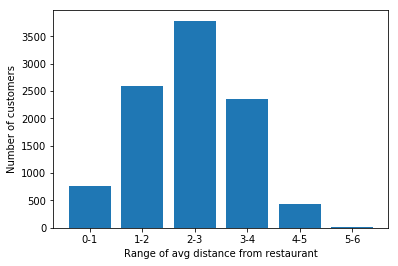

In [18]:
### Maybe there are more customers at lesser distance from the restaurant ###
n_cust_dist = [len(data.customer_id[(data.Avg_DistanceFromResturant >= 0) & (data.Avg_DistanceFromResturant < 1)]),
len(data.customer_id[(data.Avg_DistanceFromResturant >= 1) & (data.Avg_DistanceFromResturant < 2)]),
len(data.customer_id[(data.Avg_DistanceFromResturant >= 2) & (data.Avg_DistanceFromResturant < 3)]),
len(data.customer_id[(data.Avg_DistanceFromResturant >= 3) & (data.Avg_DistanceFromResturant < 4)]),
len(data.customer_id[(data.Avg_DistanceFromResturant >= 4) & (data.Avg_DistanceFromResturant < 5)]),
len(data.customer_id[(data.Avg_DistanceFromResturant >= 5) & (data.Avg_DistanceFromResturant < 6)])]

avg_dist = ['0-1', '1-2', '2-3', '3-4', '4-5', '5-6']
plt.bar(avg_dist, n_cust_dist)
plt.xlabel('Range of avg distance from restaurant')
plt.ylabel('Number of customers')
plt.show()

#### Pareto Analysis:

In [19]:
### We can also estimate the percentage of top customers (high amount spent) responsible for
### 80% (say) of the total amount ###

thre_amount = 0.8 * np.sum(data['Amount'])
cum_amt = np.cumsum(data['Amount'].sort_values(ascending = False))

print('The number of customers responsible for 80% of total amount: '+ str(sum(cum_amt <= thre_amount)))
print('The percentage of customers responsible for 80% of total amount: '+ str(sum(cum_amt <= thre_amount) * 100 /data.shape[0]))

The number of customers responsible for 80% of total amount: 2498
The percentage of customers responsible for 80% of total amount: 25.090397750100443


-  **Now that preprocessing and exploration is done, it's time to analysis the data and segment the customers into various groups according to 'some' metric. Although, '# of orders', 'Amount' and 'Recent Time' are all very good metric to segment our customers, when taken individually will not be able to provide better segments then the case where all the three metrics are combined to form a new metric. This new metric will be based on all the three metrics and can than be used to effectively segment our customers.**
-  **More specifically, customers who have ordered recently, ordered more and spent greater amount than others are the customers that will potentially be more valuable than others.**
-  **To be able to find such customers, we need to first decide on the reference date to be considered while calculating the number of days from most recent order.**

In [20]:
### Deciding on a date for referencing the current date ###
print('The most recent date overall: '+ str(data['Recent Time'].max()))

### It is safe to assume that the current date is the most recent date overall. ###

The most recent date overall: 2016-01-13 05:54:00


** Since the most recent date of order is Jan. 13th 2016, the reference date taken can be Jan. 14th 2016. Now, we can create a new column for 'Recency' metric, which is just the number of days from Jan. 14th, 2016 to the most recent order of each customer. **

In [21]:
data.reset_index(inplace= True, drop= True)

In [22]:
temp_list = []
for i in range(0, data.shape[0]):
    temp_list.append(abs((data['Recent Time'][i] - data['Recent Time'].max()).days))
    
data['Recency'] = pd.Series(temp_list)

In [23]:
data.head(3)

,customer_id,First Time,Recent Time,# of Orders,# of Orders in last 7 days,# of Orders in last 4 weeks,Amount,Amount in last 7 days,Amount in last 4 weeks,Avg_DistanceFromResturant,Avg_DeliveryTime,# of Order in 3 weeks before last week,Amount in 3 weeks before last week,Recency
0,1269647,2015-06-29 10:57:00,2015-12-10 02:18:00,212,6.0,43.0,138808,4291,26853,1.6,51,37.0,22562,35
1,167631,2015-07-04 15:39:00,2015-12-15 14:42:00,211,8.0,19.0,56404,1925,4177,2.2,42,11.0,2252,29
2,301524,2015-06-26 09:56:00,2015-12-09 20:45:00,189,9.0,33.0,36020,1772,6404,2.5,57,24.0,4632,35


### Visualizing data for most valuable customers:

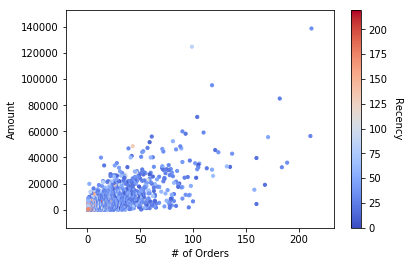

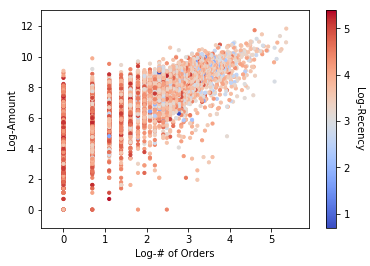

In [24]:
### Creating a new table for segmentation and visualizing ###
data_metric = data.loc[:, ['customer_id', '# of Orders', 'Amount', 'Recency']]

fig, ax = plt.subplots()
graph = ax.scatter(data_metric['# of Orders'], data_metric['Amount'], c= data_metric['Recency'], cmap='coolwarm', s=10)
cb = fig.colorbar(graph)
cb.set_label('Recency', rotation=-90, va='bottom')
ax.margins(0.1)
plt.xlabel('# of Orders')
plt.ylabel('Amount')
plt.show()

### Maybe log transformation helps in better visualization ###
fig, ax = plt.subplots()
graph = ax.scatter(np.log(data_metric['# of Orders']), np.log(data_metric['Amount']), c= np.log(data_metric['Recency']), cmap='coolwarm', s=10)
cb = fig.colorbar(graph)
cb.set_label('Log-Recency', rotation=-90, va='bottom')
ax.margins(0.1)
plt.xlabel('Log-# of Orders')
plt.ylabel('Log-Amount')
plt.show()

** The above plots, although informative, does not really reveal our valuable customers instantly. It is rather non intuitive. To be able to better recognize our valuable customer, a new metric (Recency, Frequency, Monetary metric) is desired which can then be used to segment customers. **

In [25]:
print('The quantiles to be used to segment the customers are as follows:')
data_metric.iloc[:, [1, 2, 3]].quantile(q=[0.25,0.5,0.75])

The quantiles to be used to segment the customers are as follows:


,# of Orders,Amount,Recency
0.25,1.0,280.0,40.0
0.50,2.0,689.0,66.0
0.75,7.0,2051.5,112.0


In [26]:
data_metric['q_recency'] = pd.qcut(data_metric['Recency'], q = 4, labels= [1, 2, 3, 4])
data_metric['q_monetary'] = pd.qcut(data_metric['Amount'], q = 4, labels= [1, 2, 3, 4])
data_metric['q_frequency'] = pd.qcut(data_metric['# of Orders'], q = 4, labels= [1, 2, 3], duplicates= 'drop')

** Now that the three metrics have been created, we can easilty segment the customers based on this metric. The customers who are most valuable to the company are the ones who have least 'recency_q' and most 'monetary_q' and 'frequency_q'. _i.e. 1-4-3 (R-M-F) customers._ **

In [27]:
### Let's see how our metrics data looks now ###
data_metric.head()

,customer_id,# of Orders,Amount,Recency,q_recency,q_monetary,q_frequency
0,1269647,212,138808,35,1,4,3
1,167631,211,56404,29,1,4,3
2,301524,189,36020,35,1,4,3
3,1268254,184,32489,31,1,4,3
4,357161,182,85150,25,1,4,3


In [28]:
### Finding the most valuable customers ###
val_cust_data = data_metric[(data_metric.q_recency == 1) & (data_metric.q_monetary == 4) & (data_metric.q_frequency == 3)]
val_cust_data.head()

,customer_id,# of Orders,Amount,Recency,q_recency,q_monetary,q_frequency
0,1269647,212,138808,35,1,4,3
1,167631,211,56404,29,1,4,3
2,301524,189,36020,35,1,4,3
3,1268254,184,32489,31,1,4,3
4,357161,182,85150,25,1,4,3


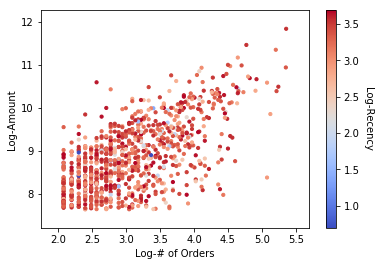

In [29]:
### Plotting graph for valuable customers ###
fig, ax = plt.subplots()
graph = ax.scatter(np.log(val_cust_data['# of Orders']), np.log(val_cust_data['Amount']), c= np.log(val_cust_data['Recency']), cmap='coolwarm', s=10)
cb = fig.colorbar(graph)
cb.set_label('Log-Recency', rotation=-90, va='bottom')
ax.margins(0.1)
plt.xlabel('Log-# of Orders')
plt.ylabel('Log-Amount')
plt.show()

** Now that we know the most valuable customers to the company based on the RMF metric, it can also be used to cluster customers. The first step in implementing K means clustering is to scale the variables since all the variables are on different scales and all the distance based machine learning models are very sensitive to scaling.**

## K-Means clustering for customer segmentation

In [30]:
### Scaling the variables ###
scaler_metric = StandardScaler()
data_metric.iloc[:, [1, 2, 3]] = scaler_metric.fit_transform(data_metric.iloc[:, [1, 2, 3]])

In [31]:
data_metric.head(5)   #### Checking ###

,customer_id,# of Orders,Amount,Recency,q_recency,q_monetary,q_frequency
0,1269647,15.596913,26.533565,-0.918705,1,4,3
1,167631,15.520820,10.520995,-1.042342,1,4,3
2,301524,13.846775,6.560020,-0.918705,1,4,3
3,1268254,13.466311,5.873883,-1.001130,1,4,3
4,357161,13.314125,16.106857,-1.124767,1,4,3


** The next step is to find the number of clusters to be used for K means clustering. This can be done using Elbow analysis. The idea is to find the minimum number of clusters beyond which addition of a new cluster does not explain much variability in the data. The sum of squared errors within clusters should be minimum and that between clusters should be maximum. This can be achieved by using Python's inbuilt method - '.inertia_'. **

### Choosing number of clusters:

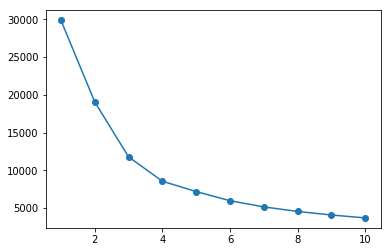

In [32]:
### Elbow Analysis to find number of clusters ###
n_clusters = range(1, 11)
cluster_sse = []
for i in n_clusters:
    kmeans = KMeans(n_clusters= i)
    kmeans.fit(data_metric.iloc[:, [1, 2, 3]])
    cluster_sse.append(kmeans.inertia_)
    
plt.plot(n_clusters, cluster_sse, marker = "o")
plt.show()

** Looking at the graph above, it can be seen that the variability drops considerably after the addition of 3-4 clusters. The actual number of clusters depends on the problem at hand, but for now, it can be safely assumed that the number of clusters is 4. Next step is to segment the customers into 4 groups.**

### Segmentation into clusters and visualization:

In [33]:
### Segmentation ###
km_cluster = KMeans(n_clusters = 4, random_state= 22)
data_metric['cluster'] = km_cluster.fit_predict(data_metric.iloc[:, [1, 2, 3]])

data_metric.head()

,customer_id,# of Orders,Amount,Recency,q_recency,q_monetary,q_frequency,cluster
0,1269647,15.596913,26.533565,-0.918705,1,4,3,2
1,167631,15.520820,10.520995,-1.042342,1,4,3,2
2,301524,13.846775,6.560020,-0.918705,1,4,3,2
3,1268254,13.466311,5.873883,-1.001130,1,4,3,2
4,357161,13.314125,16.106857,-1.124767,1,4,3,2


In [34]:
### Exporting the table to Excel ###
path = r'/Users/sudeepmbp/Desktop/ASU DA/draft.xlsx'
writer = pd.ExcelWriter(path, engine = 'xlsxwriter')
data_metric.to_excel(writer, sheet_name = 'Clusters - From Python')
writer.save()
writer.close()

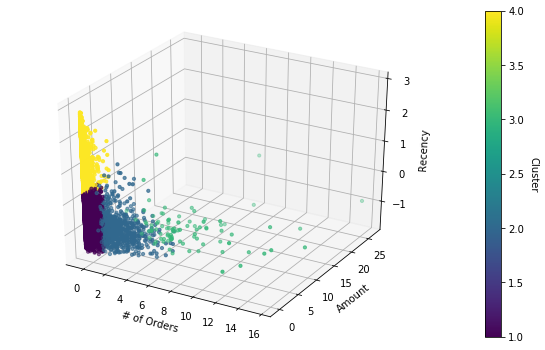

In [48]:
### Let's plot the data points according to their respective clusters ###
fig = plt.figure(figsize= (10, 6))
ax = fig.add_subplot(111, projection='3d')
graph = ax.scatter(xs = data_metric['# of Orders'], ys = data_metric['Amount'], zs = data_metric['Recency'], c= (data_metric['cluster'] + 1),zdir='z', s=10, depthshade=True)
ax.set_xlabel('# of Orders')
ax.set_ylabel('Amount')
ax.set_zlabel('Recency')
cb = fig.colorbar(graph, pad=0.1)
cb.set_label('Cluster', rotation= -90, va='bottom')
plt.show()

** Although the 3-d graph shows that cluster 3 is the cluster of customers who are most valuable to the company, visualizing it with respect to RFM metric becomes very difficult. For the purpose of visualizing clusters in 2D, we can make use of Principal Components Analysis which reduces the dimensionality while preserving the variability in the dataset at the same time. *(NOTE: There are actually 4 clusters created (0, 1, 2, 3), but fit_predict method in KMeans returns the indices of the clusters rather than number of the clusters. So I have added 1 to account for the same) **

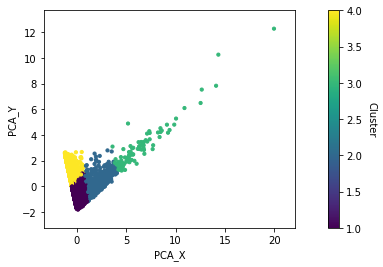

In [35]:
### PCA for better visuaization ###
pca = PCA(n_components=2, whiten=True)
pca.fit(data_metric.iloc[:, [1, 2, 3]])
pca_x = pca.fit_transform(data_metric.iloc[:, [1, 2, 3]])[:, 0]
pca_y = pca.fit_transform(data_metric.iloc[:, [1, 2, 3]])[:, 1]

fig, ax = plt.subplots()
graph = ax.scatter(pca_x, pca_y, c= (data_metric['cluster'] + 1), cmap='viridis', s=10)
cb = fig.colorbar(graph, pad = 0.1)
cb.set_label('Cluster', rotation=-90, va='bottom')
ax.margins(0.1)
plt.xlabel('PCA_X')
plt.ylabel('PCA_Y')
plt.show()

** We can see that the visualization becomes much clearer but the interpretation of what these 'principal components' mean becomes a lot difficult now. We can also try to find some descriptive aggregate statistics for all the variables in each cluster. The following lines of code demostrates the process.**

## Aggregate variable information by cluster groups

In [36]:
### Information about variables grouped by clusters ###
data['Cluster'] = (data_metric['cluster'] + 1)   ### to account for cluster indices, as index starts from 0 in Python

In [37]:
round(data.iloc[:, [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]].groupby('Cluster').mean(), 2)

,# of Orders,# of Orders in last 7 days,# of Orders in last 4 weeks,Amount,Amount in last 7 days,Amount in last 4 weeks,Avg_DistanceFromResturant,Avg_DeliveryTime,# of Order in 3 weeks before last week,Amount in 3 weeks before last week,Recency
Cluster,,,,,,,,,,,
1,4.93,0.33,1.32,1440.16,101.34,403.79,2.36,36.28,0.99,302.45,52.30
2,31.58,1.30,5.82,10135.97,439.59,1981.97,2.34,37.38,4.52,1542.38,39.14
3,88.62,3.57,15.23,37487.98,1526.62,6134.13,2.16,37.64,11.66,4607.51,35.15
4,2.17,0.00,0.00,700.31,0.00,0.00,2.39,37.97,0.00,0.00,139.22


** The above table provides some really interesting information:**
- First, as suspected, cluster number 3 really outperforms all other clusters ad the customers in that cluster is truly our most valued customer. The company should try to protect them and keep been intact.
- On the other hand, cluster number 4 is the least performing cluster. The customers in this cluster have not ordered since a long time and they tend to not spend a lot too. The company can reach out to these customers for their feedback.
- There seems to be no difference between clusters in average distance from the restaurant and average delivery time.
- The selected key performance indicators, '# of Orders' (Frequency), 'Amount' (Monetary) and 'Recency' are actually statistically different in each cluster and remain key to segmenting customers into different clusters.

** Future Scope**
- ** Feature selection and trying different models on each cluster to predeict the amount spent by customers.**
- ** Trying out different models on the overall dataset for better prediction of amount spent in last 7 days or last 30 days.**